In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd

In [44]:
import datetime as dt

In [45]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [47]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [48]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

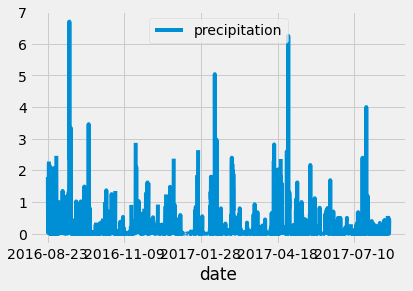

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [53]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [54]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# List the stations and the counts in descending order.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

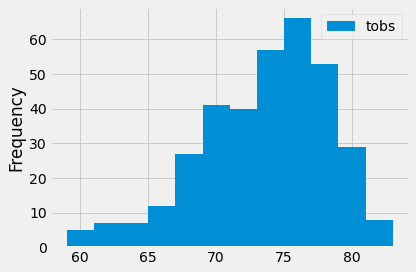

In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.tobs)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)
plt.tight_layout()

In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [57]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [58]:
import datetime
import calendar
year = 2017
month = 6
num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)

june_results = []

june_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [59]:
print(june_results)

[('2017-06-01', 0.0), ('2017-06-02', 0.0), ('2017-06-03', 0.02), ('2017-06-04', 0.0), ('2017-06-05', 0.0), ('2017-06-06', 0.0), ('2017-06-07', 0.0), ('2017-06-08', 0.0), ('2017-06-09', 0.0), ('2017-06-10', 0.04), ('2017-06-11', 0.08), ('2017-06-12', 0.02), ('2017-06-13', 0.0), ('2017-06-14', 0.0), ('2017-06-15', 0.0), ('2017-06-16', 0.0), ('2017-06-17', 0.0), ('2017-06-18', 0.05), ('2017-06-19', 0.0), ('2017-06-20', 0.02), ('2017-06-21', 0.0), ('2017-06-22', 0.0), ('2017-06-23', 0.0), ('2017-06-24', 0.06), ('2017-06-25', 0.0), ('2017-06-26', 0.0), ('2017-06-27', 0.0), ('2017-06-28', 0.0), ('2017-06-29', 0.0), ('2017-06-30', 0.08), ('2017-06-01', 0.03), ('2017-06-02', 0.1), ('2017-06-03', 0.2), ('2017-06-04', 0.15), ('2017-06-05', 0.0), ('2017-06-06', 0.0), ('2017-06-07', 0.0), ('2017-06-08', 0.02), ('2017-06-09', 0.02), ('2017-06-10', 0.21), ('2017-06-11', 0.24), ('2017-06-12', 0.19), ('2017-06-13', 0.36), ('2017-06-14', 0.27), ('2017-06-15', 0.17), ('2017-06-16', 0.02), ('2017-06-17',

In [63]:
june_dataframe = pd.DataFrame(june_results, columns=['date', 'precipitation'])
june_dataframe.set_index(june_dataframe['date'], inplace= True)
june_dataframe = june_dataframe.sort_index()


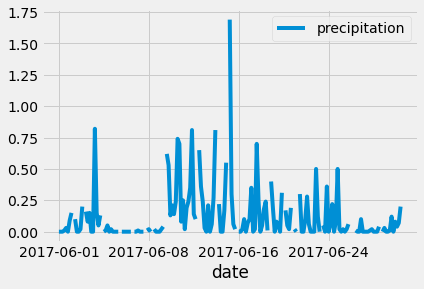

In [64]:
june_dataframe.plot()

In [65]:
june_dataframe.describe()

,precipitation
count,171.000000
mean,0.120000
std,0.217726
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


In [66]:
june_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

print(june_results)

[(80.0,), (76.0,), (76.0,), (77.0,), (75.0,), (75.0,), (75.0,), (75.0,), (72.0,), (74.0,), (74.0,), (74.0,), (76.0,), (74.0,), (75.0,), (73.0,), (79.0,), (75.0,), (72.0,), (72.0,), (74.0,), (72.0,), (72.0,), (77.0,), (71.0,), (73.0,), (76.0,), (77.0,), (76.0,), (76.0,)]


In [68]:
june_temperature = pd.DataFrame(june_results, columns=['tobs'])
june_temperature.describe()

,tobs
count,30.000000
mean,74.766667
std,2.128353
min,71.000000
25%,73.250000
50%,75.000000
75%,76.000000
max,80.000000


In [69]:
year = 2016
month = 12
num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)

december_results = []

december_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [70]:
print(december_results)

[('2016-12-01', 0.12), ('2016-12-02', 0.03), ('2016-12-03', 0.0), ('2016-12-04', 0.03), ('2016-12-05', 0.43), ('2016-12-06', 0.02), ('2016-12-07', 0.0), ('2016-12-08', 0.03), ('2016-12-09', 0.52), ('2016-12-10', 0.05), ('2016-12-11', 0.04), ('2016-12-12', 0.01), ('2016-12-13', 0.05), ('2016-12-14', 0.03), ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.01), ('2016-12-18', 0.13), ('2016-12-19', 0.01), ('2016-12-20', 0.0), ('2016-12-21', 0.0), ('2016-12-22', 0.01), ('2016-12-23', 0.01), ('2016-12-24', 0.01), ('2016-12-25', 0.0), ('2016-12-26', 0.02), ('2016-12-27', 0.0), ('2016-12-28', 0.02), ('2016-12-29', 0.04), ('2016-12-30', 0.12), ('2016-12-31', 0.01), ('2016-12-01', 0.33), ('2016-12-02', 0.3), ('2016-12-03', 0.04), ('2016-12-04', 0.1), ('2016-12-05', 0.34), ('2016-12-06', 0.02), ('2016-12-07', 0.17), ('2016-12-08', 0.03), ('2016-12-09', 0.34), ('2016-12-10', 0.02), ('2016-12-11', 0.02), ('2016-12-12', 0.01), ('2016-12-13', 0.1), ('2016-12-14', 0.05), ('2016-12-15', 0.02)

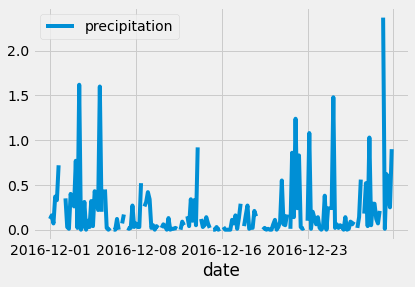

In [71]:
december_dataframe = pd.DataFrame(december_results, columns=['date', 'precipitation'])
december_dataframe.set_index(december_dataframe['date'], inplace= True)
december_dataframe = december_dataframe.sort_index() 

december_dataframe.plot()

In [72]:
december_dataframe.describe()

,precipitation
count,178.000000
mean,0.199494
std,0.342967
min,0.000000
25%,0.020000
50%,0.060000
75%,0.247500
max,2.370000


In [73]:
december_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

print(december_results)

[(74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), (65.0,), (68.0,), (62.0,), (75.0,), (70.0,), (69.0,), (76.0,), (76.0,), (74.0,), (73.0,), (71.0,), (74.0,), (74.0,), (72.0,), (71.0,), (72.0,), (74.0,), (69.0,), (67.0,)]


In [74]:
december_temperature = pd.DataFrame(december_results, columns=['tobs'])
december_temperature.describe()

,tobs
count,31.000000
mean,70.419355
std,3.364265
min,62.000000
25%,68.500000
50%,70.000000
75%,73.500000
max,76.000000
